In [1]:
import numpy as np
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [2]:
#定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR。matplotlib可视化格式为RGB，因此需将BGR转化为RGB'''
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

### 导入模型

In [3]:
seg = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection = 0)

In [4]:
 mp.solutions.selfie_segmentation.SelfieSegmentation?

Init signature: mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=0)
Docstring:     
MediaPipe Selfie Segmentation.

MediaPipe Selfie Segmentation processes an RGB image and returns a
segmentation mask.

Please refer to
https://solutions.mediapipe.dev/selfie_segmentation#python-solution-api for
usage examples.
Init docstring:
Initializes a MediaPipe Selfie Segmentation object.

Args:
  model_selection: 0 or 1. 0 to select a general-purpose model, and 1 to
    select a model more optimized for landscape images. See details in
    https://solutions.mediapipe.dev/selfie_segmentation#model_selection.
File:           c:\users\32147\appdata\roaming\python\python37\site-packages\mediapipe\python\solutions\selfie_segmentation.py
Type:           type
Subclasses:     


In [5]:
 mp.solutions.selfie_segmentation.SelfieSegmentation??

Init signature: mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=0)
Source:        
class SelfieSegmentation(SolutionBase):
  """MediaPipe Selfie Segmentation.

  MediaPipe Selfie Segmentation processes an RGB image and returns a
  segmentation mask.

  Please refer to
  https://solutions.mediapipe.dev/selfie_segmentation#python-solution-api for
  usage examples.
  """

  def __init__(self, model_selection=0):
    """Initializes a MediaPipe Selfie Segmentation object.

    Args:
      model_selection: 0 or 1. 0 to select a general-purpose model, and 1 to
        select a model more optimized for landscape images. See details in
        https://solutions.mediapipe.dev/selfie_segmentation#model_selection.
    """
    super().__init__(
        binary_graph_path=BINARYPB_FILE_PATH,
        side_inputs={
            'model_selection': model_selection,
        },
        outputs=['segmentation_mask'])

  def process(self, image: np.ndarray) -> NamedTuple:
    """Processes 

### 读入图像

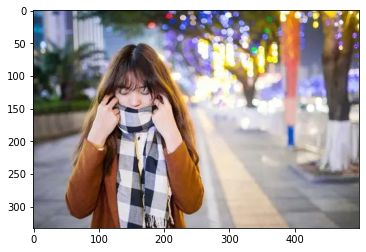

In [13]:
img = cv2.imread('./images/Camera2.jpg')
look_img(img)

In [14]:
img.shape

(333, 499, 3)

### 将图像输入模型，获取预测结果

In [15]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = seg.process(img_RGB)

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
results.segmentation_mask.shape

(333, 499)

In [18]:
results.segmentation_mask

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.1099712e-33, 2.2717124e-33, 6.7621621e-34, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.7525032e-33, 2.0105960e-33, 5.9849023e-34, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.6377813e-28, 1.9267960e-28, 5.7354567e-29, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9428700e-22, 1.4191906e-22, 4.2244773e-23, ..., 1.2503883e-30,
        4.3067155e-31, 0.0000000e+00],
       [5.6015213e-22, 4.0916923e-22, 1.2179661e-22, ..., 3.6050155e-30,
        1.2416762e-30, 0.0000000e+00]], dtype=float32)

In [19]:
img_RGB.shape

(333, 499, 3)

In [20]:
results.segmentation_mask.min()

0.0

In [21]:
results.segmentation_mask.max()

1.0

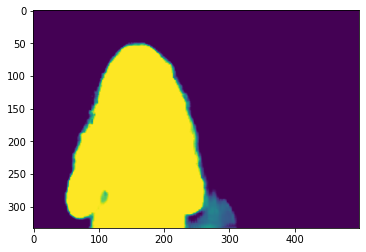

In [22]:
plt.imshow(results.segmentation_mask)

In [23]:
mask = results.segmentation_mask.astype('uint8')

In [24]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
mask.max()

1

In [26]:
mask.min()

0

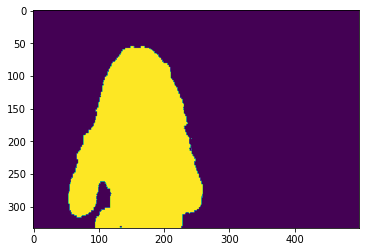

In [27]:
plt.imshow(mask)